In [1]:
import pandas as pd

In [12]:
df = pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv", index_col = False)

In [13]:
df.columns

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

# Day 4

## 4.1 How many different companies are represented in the data set?

In [14]:
df['Company Name'].nunique()

439

## 4.2 What is the total number of jobs created for businesses in Queens?

In [15]:
df["City"] = df["City"].str.lower()
df.loc[df['City'].str.contains("queens"), 'Job created'].sum()

90.0

## 4.3 How many different unique email domains names are there in the data set?

In [22]:
df.dropna(subset = ['company email'])

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,new york,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan
5,"120 Wall Street, LLC",Jason McCalla,jmccalla@silvprop.com,2125517391,120 Wall Street,new york,NY,10005,Commercial,Back Offices,...,2090906.36,New York,40.704380,-74.006427,101.0,1.0,7.0,1000871.0,1.000370e+09,Battery Park City-Lower Manhattan
6,"139 ACA Realty, Inc.",Eitan Chandally,barbara@dial7.com,7187076123,43-23 35th Street,long island city,NY,11101,Commercial,Limousine Service,...,129401.39,Queens,40.745706,-73.929565,402.0,26.0,179.0,4003160.0,4.002220e+09,Hunters Point-Sunnyside-West Maspeth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,"WONTON FOOD, INC.",DONALD LAU,donaldlau@wontonfood.com,7186286868,220-222 MOORE STREET,brooklyn,NY,11206,Manufacturing,"MFG. PASTA, EGGROLL SKINS",...,965843.58,Brooklyn,40.704425,-73.936010,301.0,34.0,485.0,3071539.0,3.031090e+09,Bushwick South
446,Wood Works,Gordon Brawm,brawnworks@gmail.com,9179404950,162 Cook Street,brooklyn,NY,11206,Manufacturing,Installer of wood furniture,...,3585.40,Brooklyn,40.702869,-73.936466,301.0,34.0,485.0,3071625.0,3.031230e+09,Bushwick South
447,"WorldWide Plumbing Supply, Inc.",Surie Lefkowitz,sheidya@wwps.com,7188533002,125 Lake Avenue,staten island,NY,10303,Manufacturing,"Plumbing Fixtures, Parts & Supplies, Plumbers",...,20487.73,Staten Island,40.633518,-74.150942,501.0,49.0,239.0,5107122.0,5.011610e+09,Mariner's Harbor-Arlington-Port Ivory-Granitev...
448,WUD Furniture LLC,Keren Springer,keren@wudfurniture.com,7184867952,1102 Atlantic Avenue,brooklyn,NY,11238,Manufacturing,"We make handcrafted furniture, surfaces, lighting",...,12287.32,Brooklyn,40.679518,-73.956819,308.0,35.0,305.0,3027572.0,3.011260e+09,Crown Heights North


In [24]:
email_df = df.dropna(subset = ['company email'])
email_df['domain'] = email_df['company email'].str.split("@").str.get(1)
email_df['domain'].nunique()

<ipython-input-24-1ad8ba096a53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_df['domain'] = email_df['company email'].str.split("@").str.get(1)


356

## 4.4 Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

In [35]:
business_count = df[['Company Name', 'NTA']].groupby('NTA').count().reset_index()
#df[['Company Name', 'NTA']].value_counts()

In [51]:
NTA_considered_ls = list(business_count.loc[business_count['Company Name']>=5, 'NTA'].values)
avg_total_saving_df = df.loc[df['NTA'].isin(NTA_considered_ls), ['NTA','Job created', 'Total Savings']].groupby('NTA').mean().reset_index()

In [53]:
avg_total_saving_df

,NTA,Job created,Total Savings
0,Battery Park City-Lower Manhattan,NaN,469890.796667
1,Bushwick South,10.000000,26140.455000
2,Carroll Gardens-Columbia Street-Red Hook,NaN,24337.390000
3,College Point,2.000000,17159.372857
4,Crown Heights North,NaN,4036.298889
5,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,NaN,59950.340000
6,East New York,15.000000,48433.093333
7,East Williamsburg,NaN,13990.626364
8,Greenpoint,NaN,9753.649286
9,Hunters Point-Sunnyside-West Maspeth,NaN,23931.398933


## 4.5 Save your result for the previous question as a CSV file.

In [52]:
avg_total_saving_df.to_csv('average_total_saving_job_per_NTA.csv')

# Day 5

In [55]:
import matplotlib.pyplot as plt

# 5.1 scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

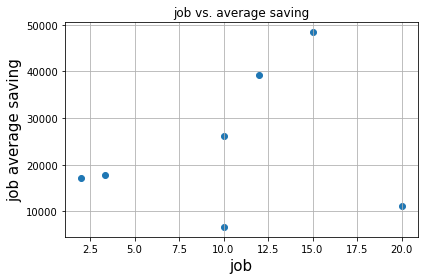

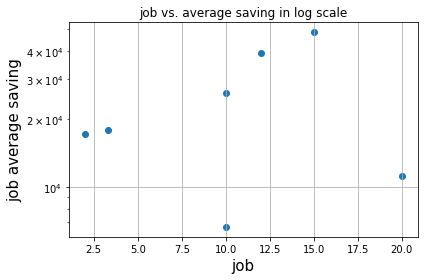

In [60]:
job_ls  = avg_total_saving_df["Job created"]
saving_ls = avg_total_saving_df["Total Savings"]


# standard
fig, ax = plt.subplots()
ax.scatter(job_ls, saving_ls)
ax.set_xlabel('job', fontsize=15)
ax.set_ylabel('job average saving', fontsize=15)
ax.set_title('job vs. average saving')
ax.grid(True)
fig.tight_layout()
plt.show()

# log 
fig, ax = plt.subplots()
ax.scatter(job_ls, saving_ls)
ax.set_xlabel('job', fontsize=15)
ax.set_ylabel('job average saving', fontsize=15)
ax.set_title('job vs. average saving in log scale')
ax.set_yscale("log")
ax.grid(True)
fig.tight_layout()
plt.show()


# 5.2 histogram of the log of the average total savings.

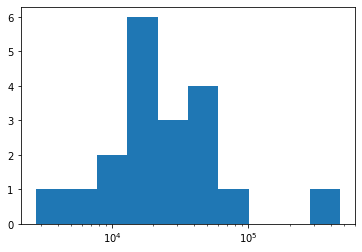

In [65]:
import numpy as np
# https://stackoverflow.com/questions/47850202/plotting-a-histogram-on-a-log-scale-with-matplotlib

def plot_loghist(x, bins):
  hist, bins = np.histogram(x, bins=bins)
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  plt.hist(x, bins=logbins)
  plt.xscale('log')
    
plot_loghist(saving_ls, 10)
    

# 5.3 line plot of the total jobs created for each month.

In [68]:
df['month'] = pd.to_datetime(df['Effective Date']).dt.month

In [72]:
job_df = df[['Job created', 'month']].groupby('month').sum().reset_index()
job_df

,month,Job created
0,1,0.0
1,2,27.0
2,3,20.0
3,4,2.0
4,5,2.0
5,6,63.0
6,7,20.0
7,8,0.0
8,9,0.0
9,10,0.0


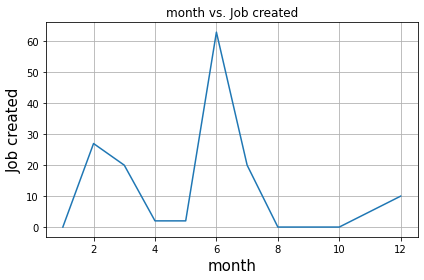

In [73]:
job_df['Job created']
job_df['month']

fig, ax = plt.subplots()
ax.plot(job_df['month'], job_df['Job created'])
ax.set_xlabel('month', fontsize=15)
ax.set_ylabel('Job created', fontsize=15)
ax.set_title('month vs. Job created')
ax.grid(True)
fig.tight_layout()
plt.show()